In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
def get_grad(t):
    output = np.zeros((3,2))
    output[0,0] = ((np.cos(t) - t*np.sin(t)) / (np.sin(t) + t*np.cos(t)))
    output[2,0] = 1.
    output[1,1] = 1.
    output = output / np.linalg.norm(output, axis = 0)
    return(output)
def rotator(rotatee, theta):
    rm = np.asarray([[np.cos(theta), - np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    rm3 = np.zeros((3,3))
    rm3[2,2] = 1.
    rm3[0:2,0:2] = rm
    output = np.matmul(rm3, rotatee.transpose())
    return(output.transpose())

In [3]:
# def check_random_state(seed):
#     """Turn seed into a `np.random.RandomState` instance.

#     Parameters
#     ----------
#     seed : None, int or np.random.RandomState
#            If `seed` is None, return the RandomState singleton used by `np.random`.
#            If `seed` is an int, return a new RandomState instance seeded with `seed`.
#            If `seed` is already a RandomState instance, return it.

#     Raises
#     ------
#     ValueError
#         If `seed` is of the wrong type.

#     """
#     # Function originally from scikit-learn's module sklearn.utils.validation
#     if seed is None or seed is np.random:
#         return np.random.mtrand._rand
#     if isinstance(seed, (numbers.Integral, np.integer)):
#         return np.random.RandomState(seed)
#     if isinstance(seed, np.random.RandomState):
#         return seed
#     raise ValueError('%r cannot be used to seed a numpy.random.RandomState'
#                      ' instance' % seed)


In [4]:

# def make_swiss_roll(n_samples=100, noise=0.0, random_state=None):
#     """Generate a swiss roll dataset.

#     Read more in the :ref:`User Guide <sample_generators>`.

#     Parameters
#     ----------
#     n_samples : int, optional (default=100)
#         The number of sample points on the S curve.

#     noise : float, optional (default=0.0)
#         The standard deviation of the gaussian noise.

#     random_state : int, RandomState instance or None, optional (default=None)
#         If int, random_state is the seed used by the random number generator;
#         If RandomState instance, random_state is the random number generator;
#         If None, the random number generator is the RandomState instance used
#         by `np.random`.

#     Returns
#     -------
#     X : array of shape [n_samples, 3]
#         The points.

#     t : array of shape [n_samples]
#         The univariate position of the sample according to the main dimension
#         of the points in the manifold.

#     Notes
#     -----
#     The algorithm is from Marsland [1].

#     References
#     ----------
#     .. [1] S. Marsland, "Machine Learning: An Algorithmic Perspective",
#            Chapter 10, 2009.
#            http://seat.massey.ac.nz/personal/s.r.marsland/Code/10/lle.py
#     """
#     generator = check_random_state(random_state)

#     t = 1.5 * np.pi * (1 + 2 * generator.rand(1, n_samples))
#     x = t * np.cos(t)
#     y = 21 * generator.rand(1, n_samples)
#     z = t * np.sin(t)

#     X = np.concatenate((x, y, z))
#     X += noise * generator.randn(3, n_samples)
#     X = X.T
#     t = np.squeeze(t)

#     return X, t


In [5]:
# #dat = np.asarray(make_swiss_roll(n_samples=100, noise=0.0, random_state=None))
# sw = make_swiss_roll(n_samples=100000, noise=0.0, random_state=None)
# data = np.asarray(sw[0])
# ts = np.asarray(sw[1])

In [6]:
# data2 = rotator(data,np.pi/3)

In [7]:
# selected_points = np.random.choice(100000,50,replace = False)

In [8]:
# grads = np.asarray([get_grad(t) for t in ts[selected_points]])
# grads2 = rotator(grads,np.pi/3)
# fullgrads = np.zeros((len(selected_points),3,5))
# for i in range(len(selected_points)):
#     fullgrads[:,0,2] = np.ones(len(selected_points))
#     fullgrads[:,1,3] = np.ones(len(selected_points))
#     fullgrads[:,2,4] = np.ones(len(selected_points))
#     fullgrads[:,:,0:2] = grads2

In [9]:
#                 %matplotlib notebook
#                 data = data2
#                 fig = plt.figure(figsize=(12,6))
#                 ax = fig.add_subplot(1, 1, 1, projection='3d')
#                 cax = ax.scatter(data2[:1000, 0], data2[:1000, 1], data2[:1000,2], alpha = 1, s = 1)
#                 ax.set(xlabel='x', ylabel='y', zlabel='z')
#                 for i in range(len(selected_points)):
#                     X,Y,Z = data2[selected_points[i],:]
#                     for j in range(2):
#                         U,V,W = fullgrads[i,:,j] * 1
#                         ax.quiver(X,Y,Z,U,V,W, alpha = .5, colors = cols[j])
#                 #ax.set_axis_off()
#                 #fig.colorbar(cax)

In [10]:

def make_swiss_roll(n_samples=100, noise=0.0, random_state=None):
    n = n_samples
    d = 3
    xvar = 0
    dim = 2
    noise = False
    theta = np.pi / 3
    ts = 1.5 * np.pi * (1 + 2 * np.random.uniform(low=0.0, high=1.0, size=n))
    x = ts * np.cos(ts)
    y = 21 * np.random.uniform(low=0.0, high=1.0, size=n)
    z = ts * np.sin(ts)
    X = np.vstack((x, y, z))
    #X += noise * generator.randn(3, n_samples)
    X = X.T
    data = rotator(X,theta)
    return data, ts

In [11]:
#dat = np.asarray(make_swiss_roll(n_samples=100, noise=0.0, random_state=None))
sw = make_swiss_roll(n_samples=100000, noise=0.0, random_state=None)
data = np.asarray(sw[0])
ts = np.asarray(sw[1])

In [17]:
selected_points = np.random.choice(100000,50,replace = False)
cols = ['black','red','green','yellow','blue']

In [18]:
grads = np.asarray([get_grad(t) for t in ts[selected_points]])
grads2 = rotator(grads,np.pi/3)
fullgrads = np.zeros((len(selected_points),3,5))
for i in range(len(selected_points)):
    fullgrads[:,0,2] = np.ones(len(selected_points))
    fullgrads[:,1,3] = np.ones(len(selected_points))
    fullgrads[:,2,4] = np.ones(len(selected_points))
    fullgrads[:,:,0:2] = grads2

<IPython.core.display.Javascript object>


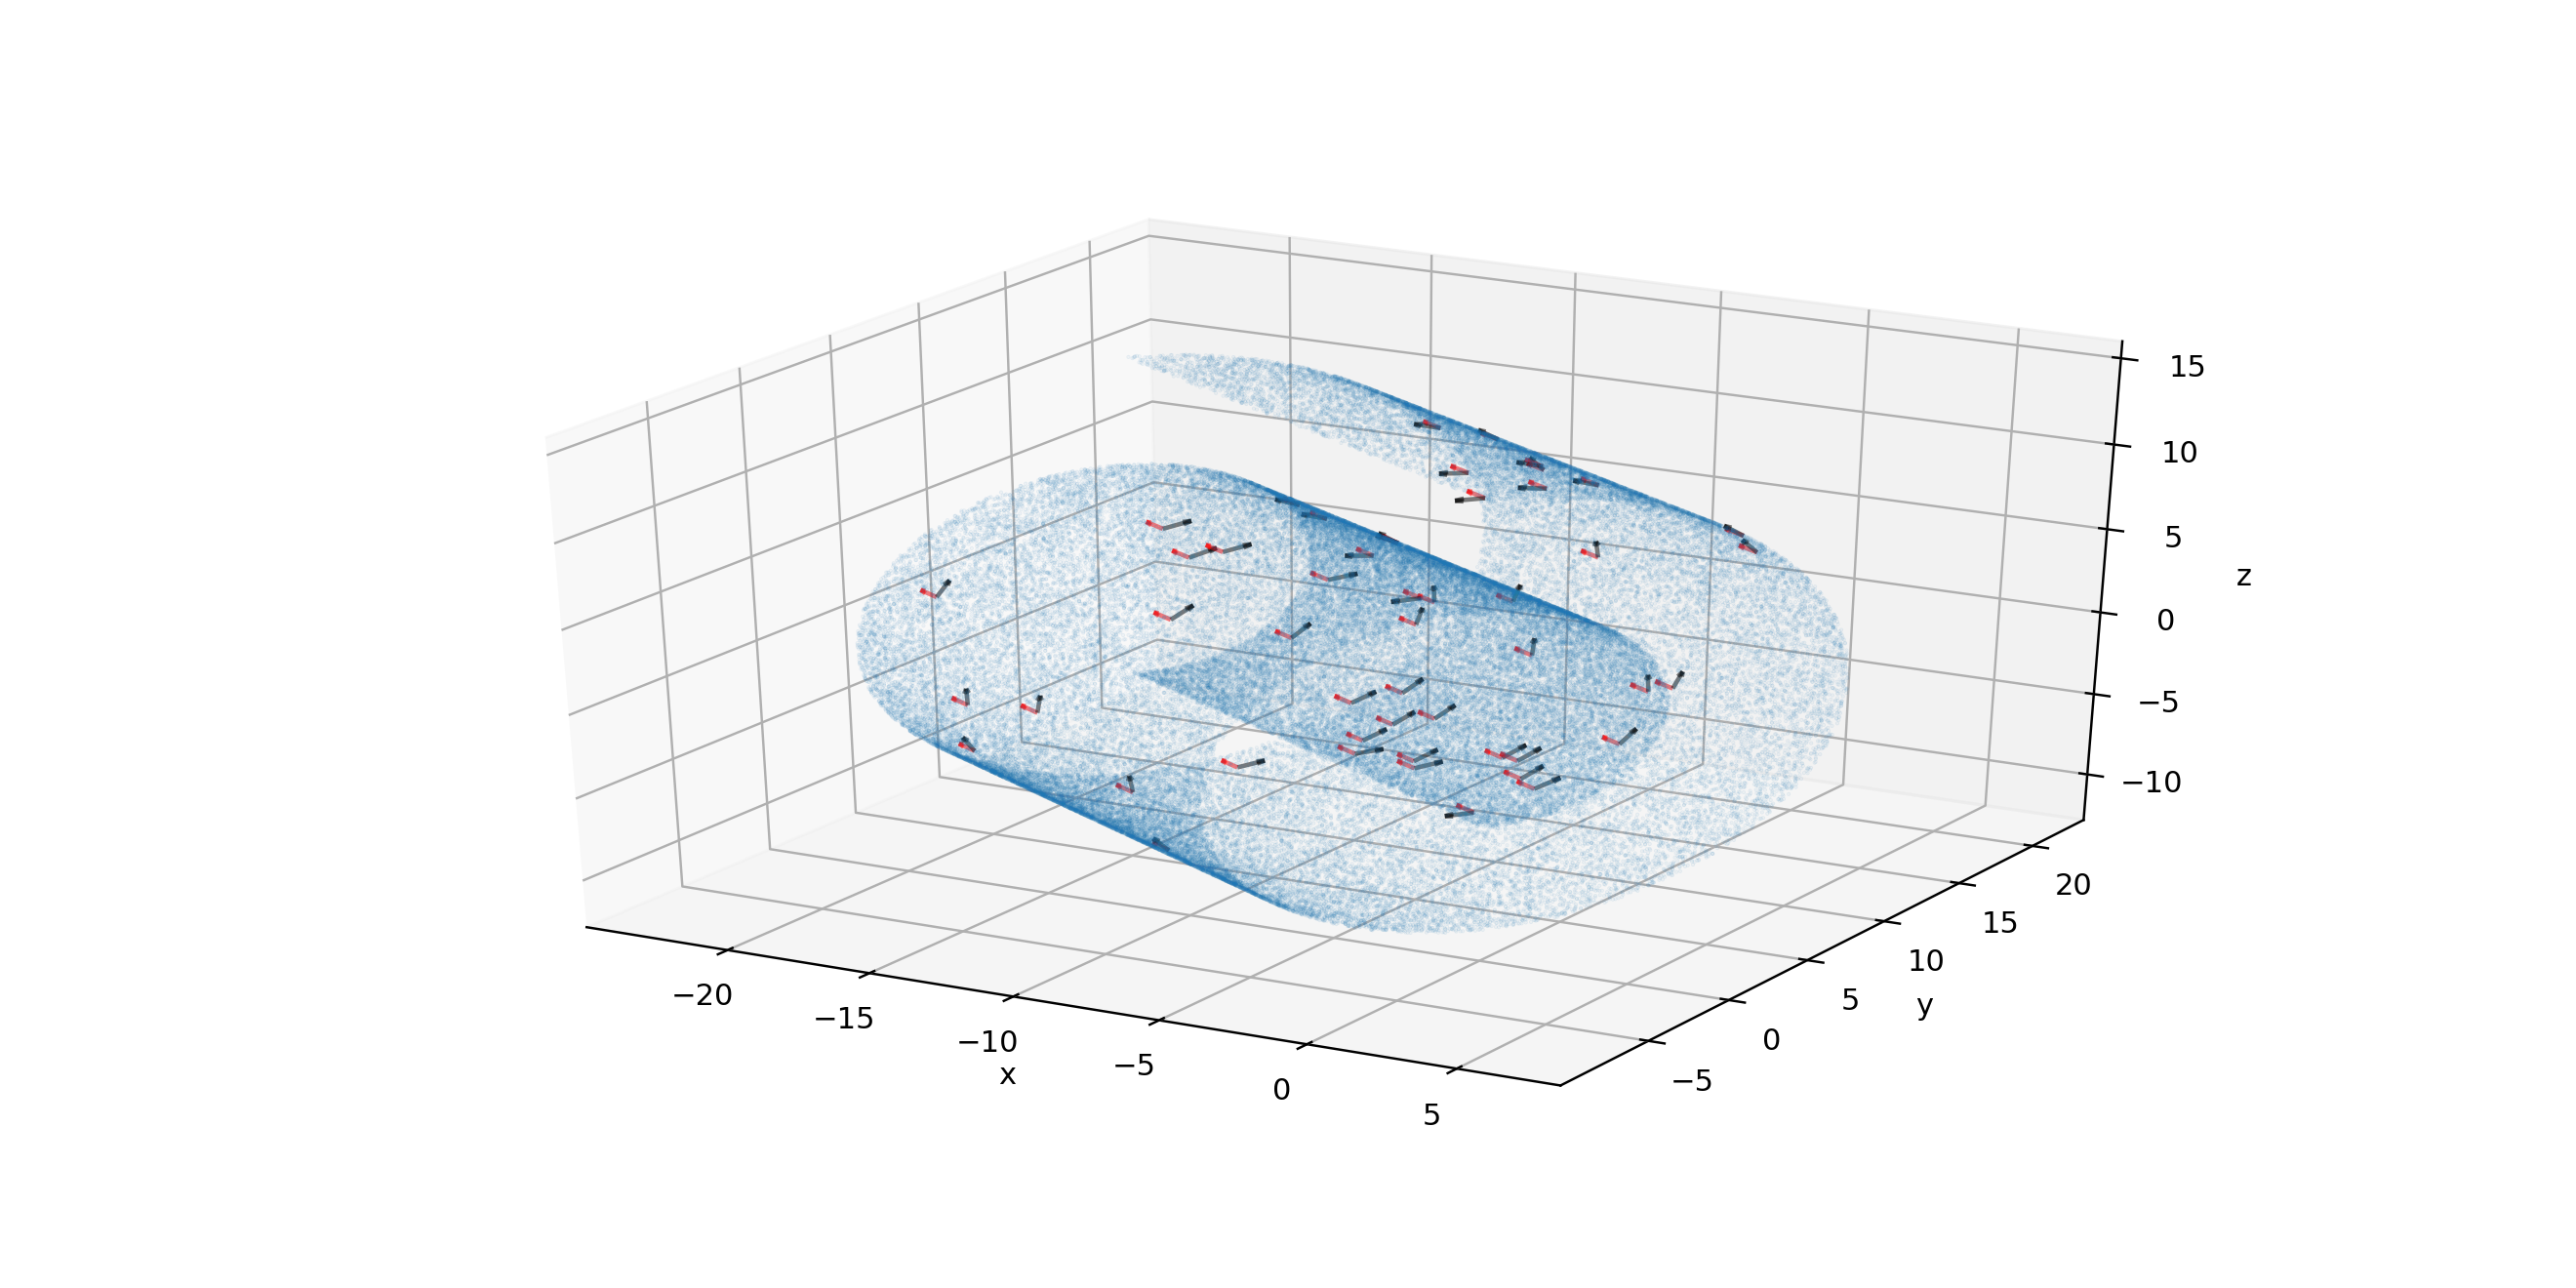

In [19]:
                %matplotlib notebook
                fig = plt.figure(figsize=(12,6))
                ax = fig.add_subplot(1, 1, 1, projection='3d')
                cax = ax.scatter(data[:100000, 0], data[:100000, 1], data[:100000,2], alpha = .1, s = .1)
                ax.set(xlabel='x', ylabel='y', zlabel='z')
                for i in range(len(selected_points)):
                    X,Y,Z = data[selected_points[i],:]
                    for j in range(2):
                        U,V,W = fullgrads[i,:,j] * 1
                        ax.quiver(X,Y,Z,U,V,W, alpha = .5, colors = cols[j])
                #ax.scatter(data[nbr, 0], data[nbr, 1], data[nbr,2], alpha = 1, s = 1, c= 'red')
                #ax.set_axis_off()
                #fig.colorbar(cax)

In [343]:
nbr

array([   49,   131,   198, ..., 99834, 99974, 99985])

In [170]:
#data2 = rotator(data,np.pi/3)

In [21]:
from megaman.embedding import spectral_embedding
from megaman.geometry import Geometry
from megaman.geometry import RiemannMetric

In [22]:
        dim = 2
        diffusion_time = 0.5
        n_neighbors = 1000
        #set radius according to paper (i think this is dim not d)
        radius = (diffusion_time * (diffusion_time * np.pi * 4)**(dim/2))**(0.5)
        #set adjacency radius large enough that points beyond it have affinity close to zero
        bigradius = 3 * radius
        adjacency_method = 'cyflann'
        cyflann_kwds = {'index_type':'kdtrees', 'num_trees':10, 'num_checks':n_neighbors}
        adjacency_kwds = {'radius':bigradius, 'cyflann_kwds':cyflann_kwds}
        affinity_method = 'gaussian'
        affinity_kwds = {'radius':radius}
        laplacian_method = 'geometric'
        laplacian_kwds = {'scaling_epps':radius}
        geom = Geometry(adjacency_method=adjacency_method, adjacency_kwds=adjacency_kwds,
                        affinity_method=affinity_method, affinity_kwds=affinity_kwds,
                        laplacian_method=laplacian_method, laplacian_kwds=laplacian_kwds)
        geom.set_data_matrix(data)
        adjacency_matrix = geom.compute_adjacency_matrix()
        laplacian_matrix = geom.compute_laplacian_matrix()

initializing Geometry
executing laplacian.compute_laplacian_matrix
executing Laplacian.laplacian_matrix
pre _compute_laplacian
executing GeometricLaplacian._compute_laplacian
executing _normalize_laplacian
executing _normalize_laplacian
post _compute_laplacian


In [23]:
    def compute_nbr_wts(A, sample):
        Ps = list()
        nbrs = list()
        for ii in range(len(sample)):
            w = np.array(A[sample[ii],:].todense()).flatten()
            p = w / np.sum(w)
            nbrs.append(np.where(p > 0)[0])
            Ps.append(p[nbrs[ii]])
        return(Ps, nbrs)

In [51]:
        A = geom.affinity_matrix
        (PS, nbrs) = compute_nbr_wts(A, selected_points)
        d = data.shape[1]
        tangent_bases = np.zeros((nsel, d, dim))
        for i in range(nsel):
            # print(i)
            p = PS[i]
            nbr = nbrs[i]
            Z = (data[nbr, :] - np.dot(p, data[nbr, :])) * p[:, np.newaxis]
            sig = np.dot(Z.transpose(), Z)
            e_vals, e_vecs = np.linalg.eigh(sig)
            j = e_vals.argsort()[::-1]  # Returns indices that will sort array from greatest to least.
            e_vec = e_vecs[:, j]
            e_vec = e_vec[:, :dim]
            tangent_bases[i, :, :] = e_vec

In [61]:
nbr = nbrs[47]

In [63]:
fullgrads.shape

(50, 3, 5)

<IPython.core.display.Javascript object>


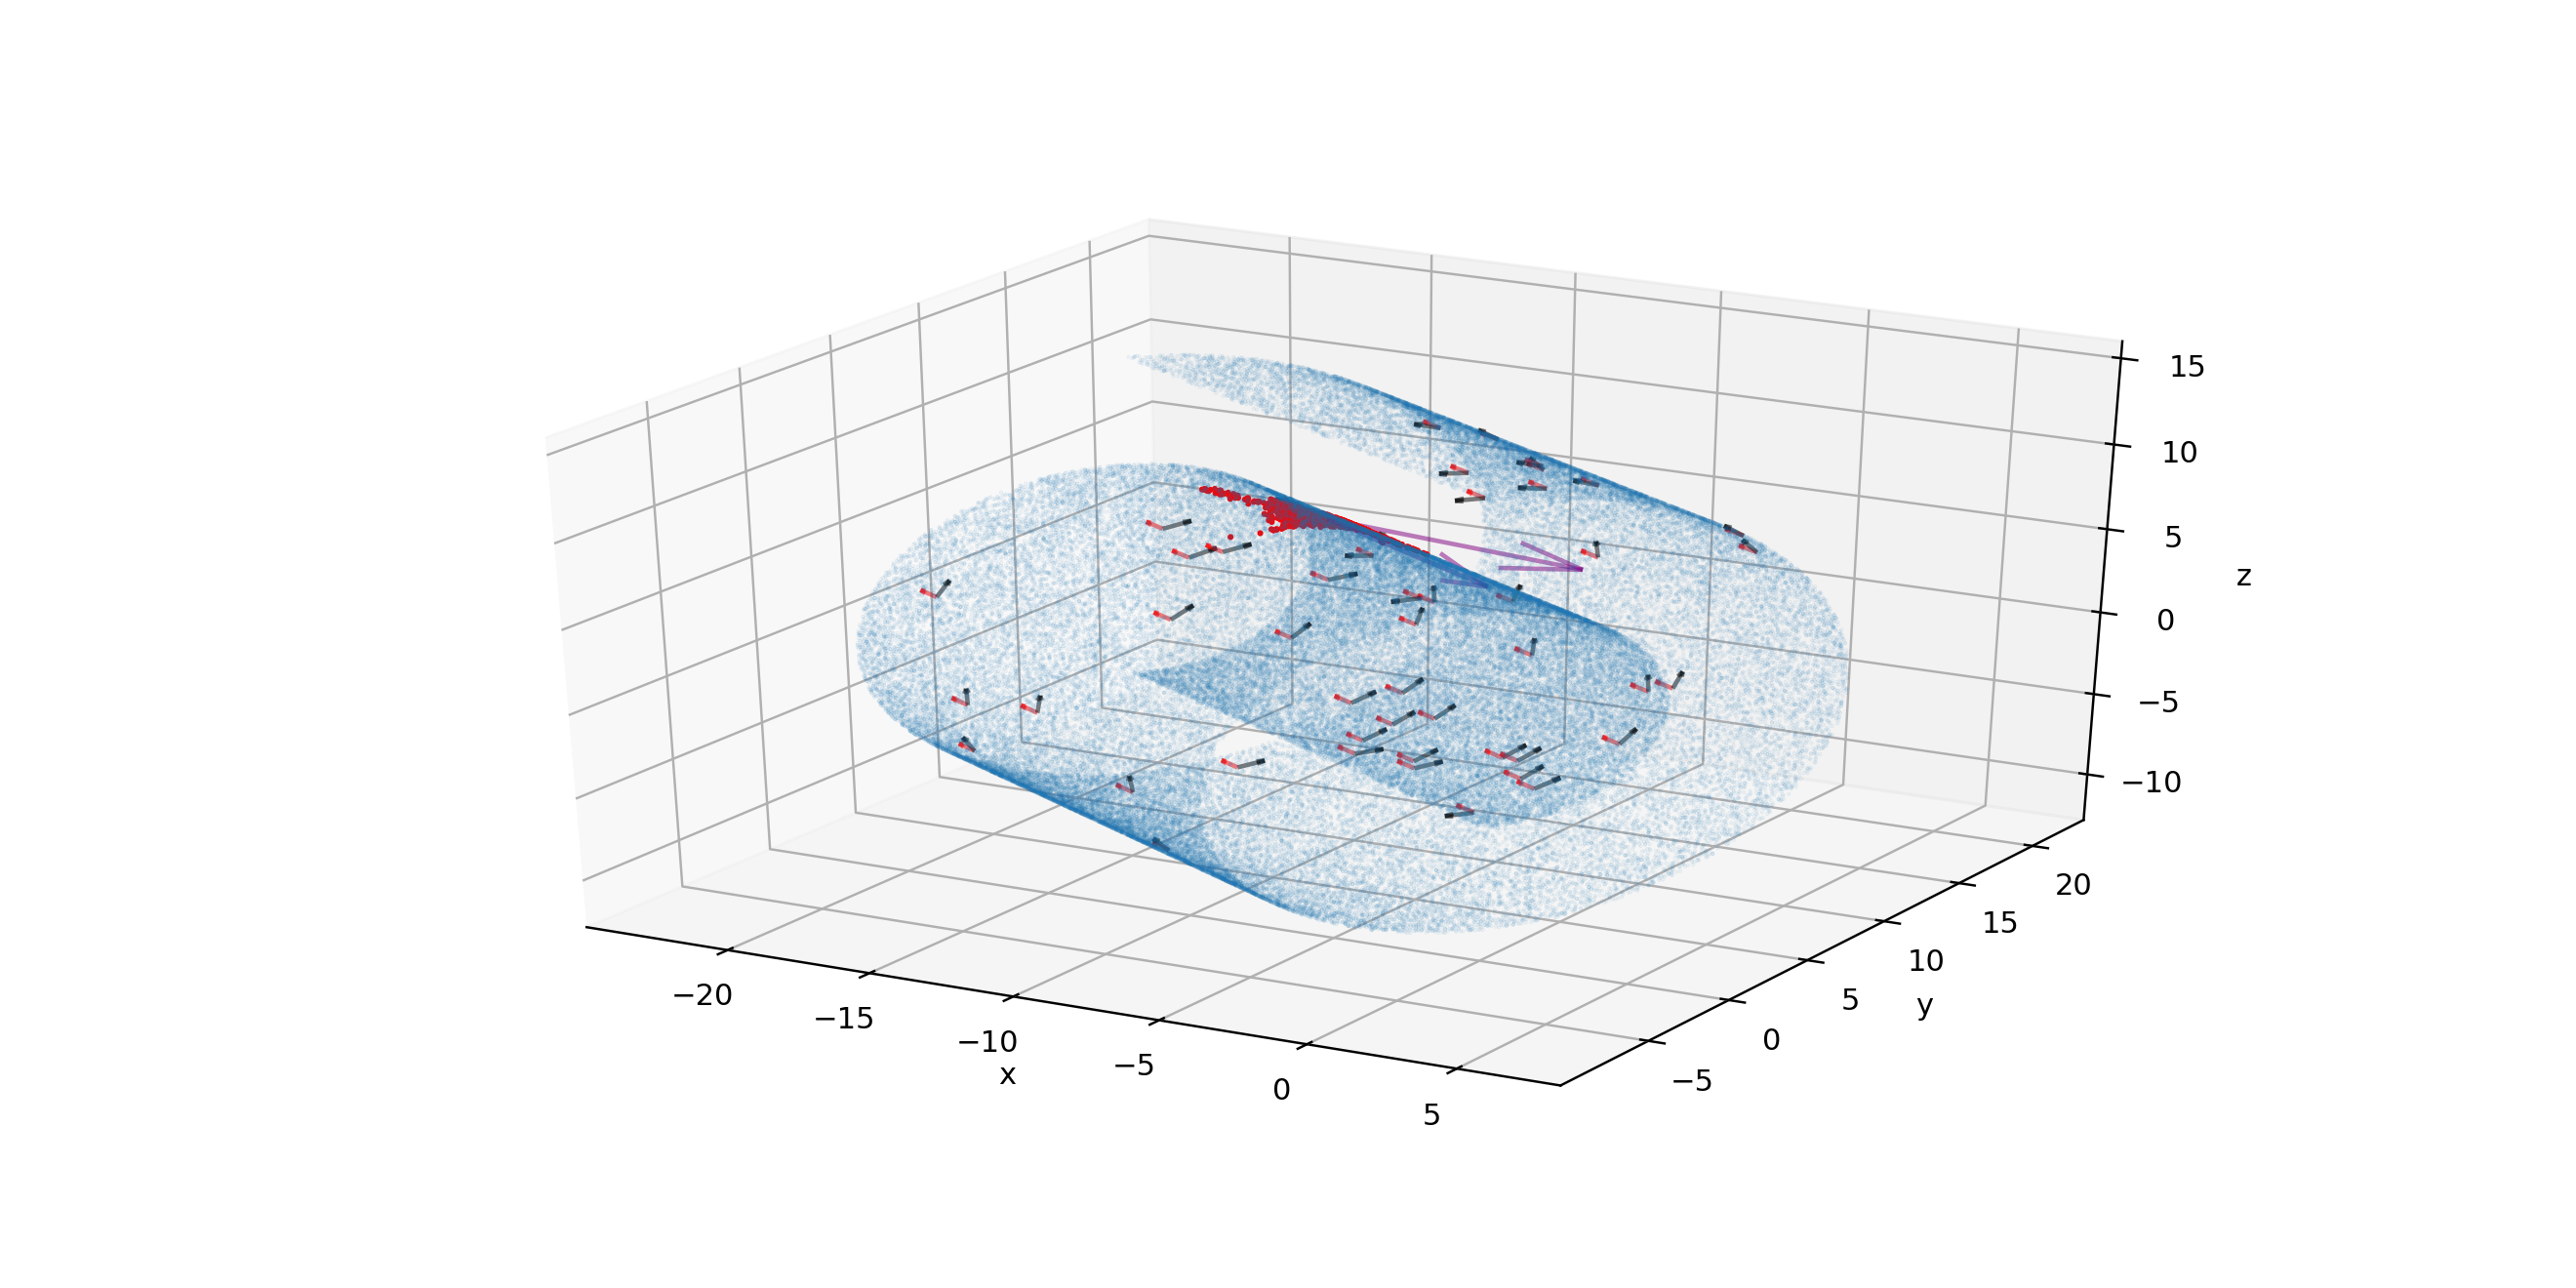

In [62]:
                %matplotlib notebook
                fig = plt.figure(figsize=(12,6))
                ax = fig.add_subplot(1, 1, 1, projection='3d')
                cax = ax.scatter(data[:100000, 0], data[:100000, 1], data[:100000,2], alpha = .1, s = .1)
                ax.set(xlabel='x', ylabel='y', zlabel='z')
                for i in range(len(selected_points)):
                    X,Y,Z = data[selected_points[i],:]
                    for j in range(2):
                        U,V,W = fullgrads[i,:,j] * 1
                        ax.quiver(X,Y,Z,U,V,W, alpha = .5, colors = cols[j])
                ax.scatter(data[nbr, 0], data[nbr, 1], data[nbr,2], alpha = 1, s = 1, c= 'red')
                X,Y,Z = data[selected_points[47],:]
                for j in range(2):
                    U,V,W = tangent_bases[47,:,j] * 10
                    ax.quiver(X,Y,Z,U,V,W, alpha = .5, colors = 'purple')
                #ax.set_axis_off()
                #fig.colorbar(cax)

In [56]:
i = 46
dg_M = np.dot(fullgrads[i].transpose(),tangent_bases[i])
np.linalg.norm(dg_M, axis = 1)
#np.dot(dg_M[0], dg_M[1])


array([0.99990546, 0.99999968, 0.99535718, 0.98573576, 0.19387909])

In [57]:
np.linalg.norm(np.asarray([np.dot(fullgrads[i].transpose(),tangent_bases[i]) for i in range(50)]), axis = 2).sum(axis = 0)

array([49.99393914, 49.9996112 , 47.11696346, 40.04336822, 29.38560612])

In [241]:
np.dot(dg_M[0], dg_M[2])

0.0

<IPython.core.display.Javascript object>


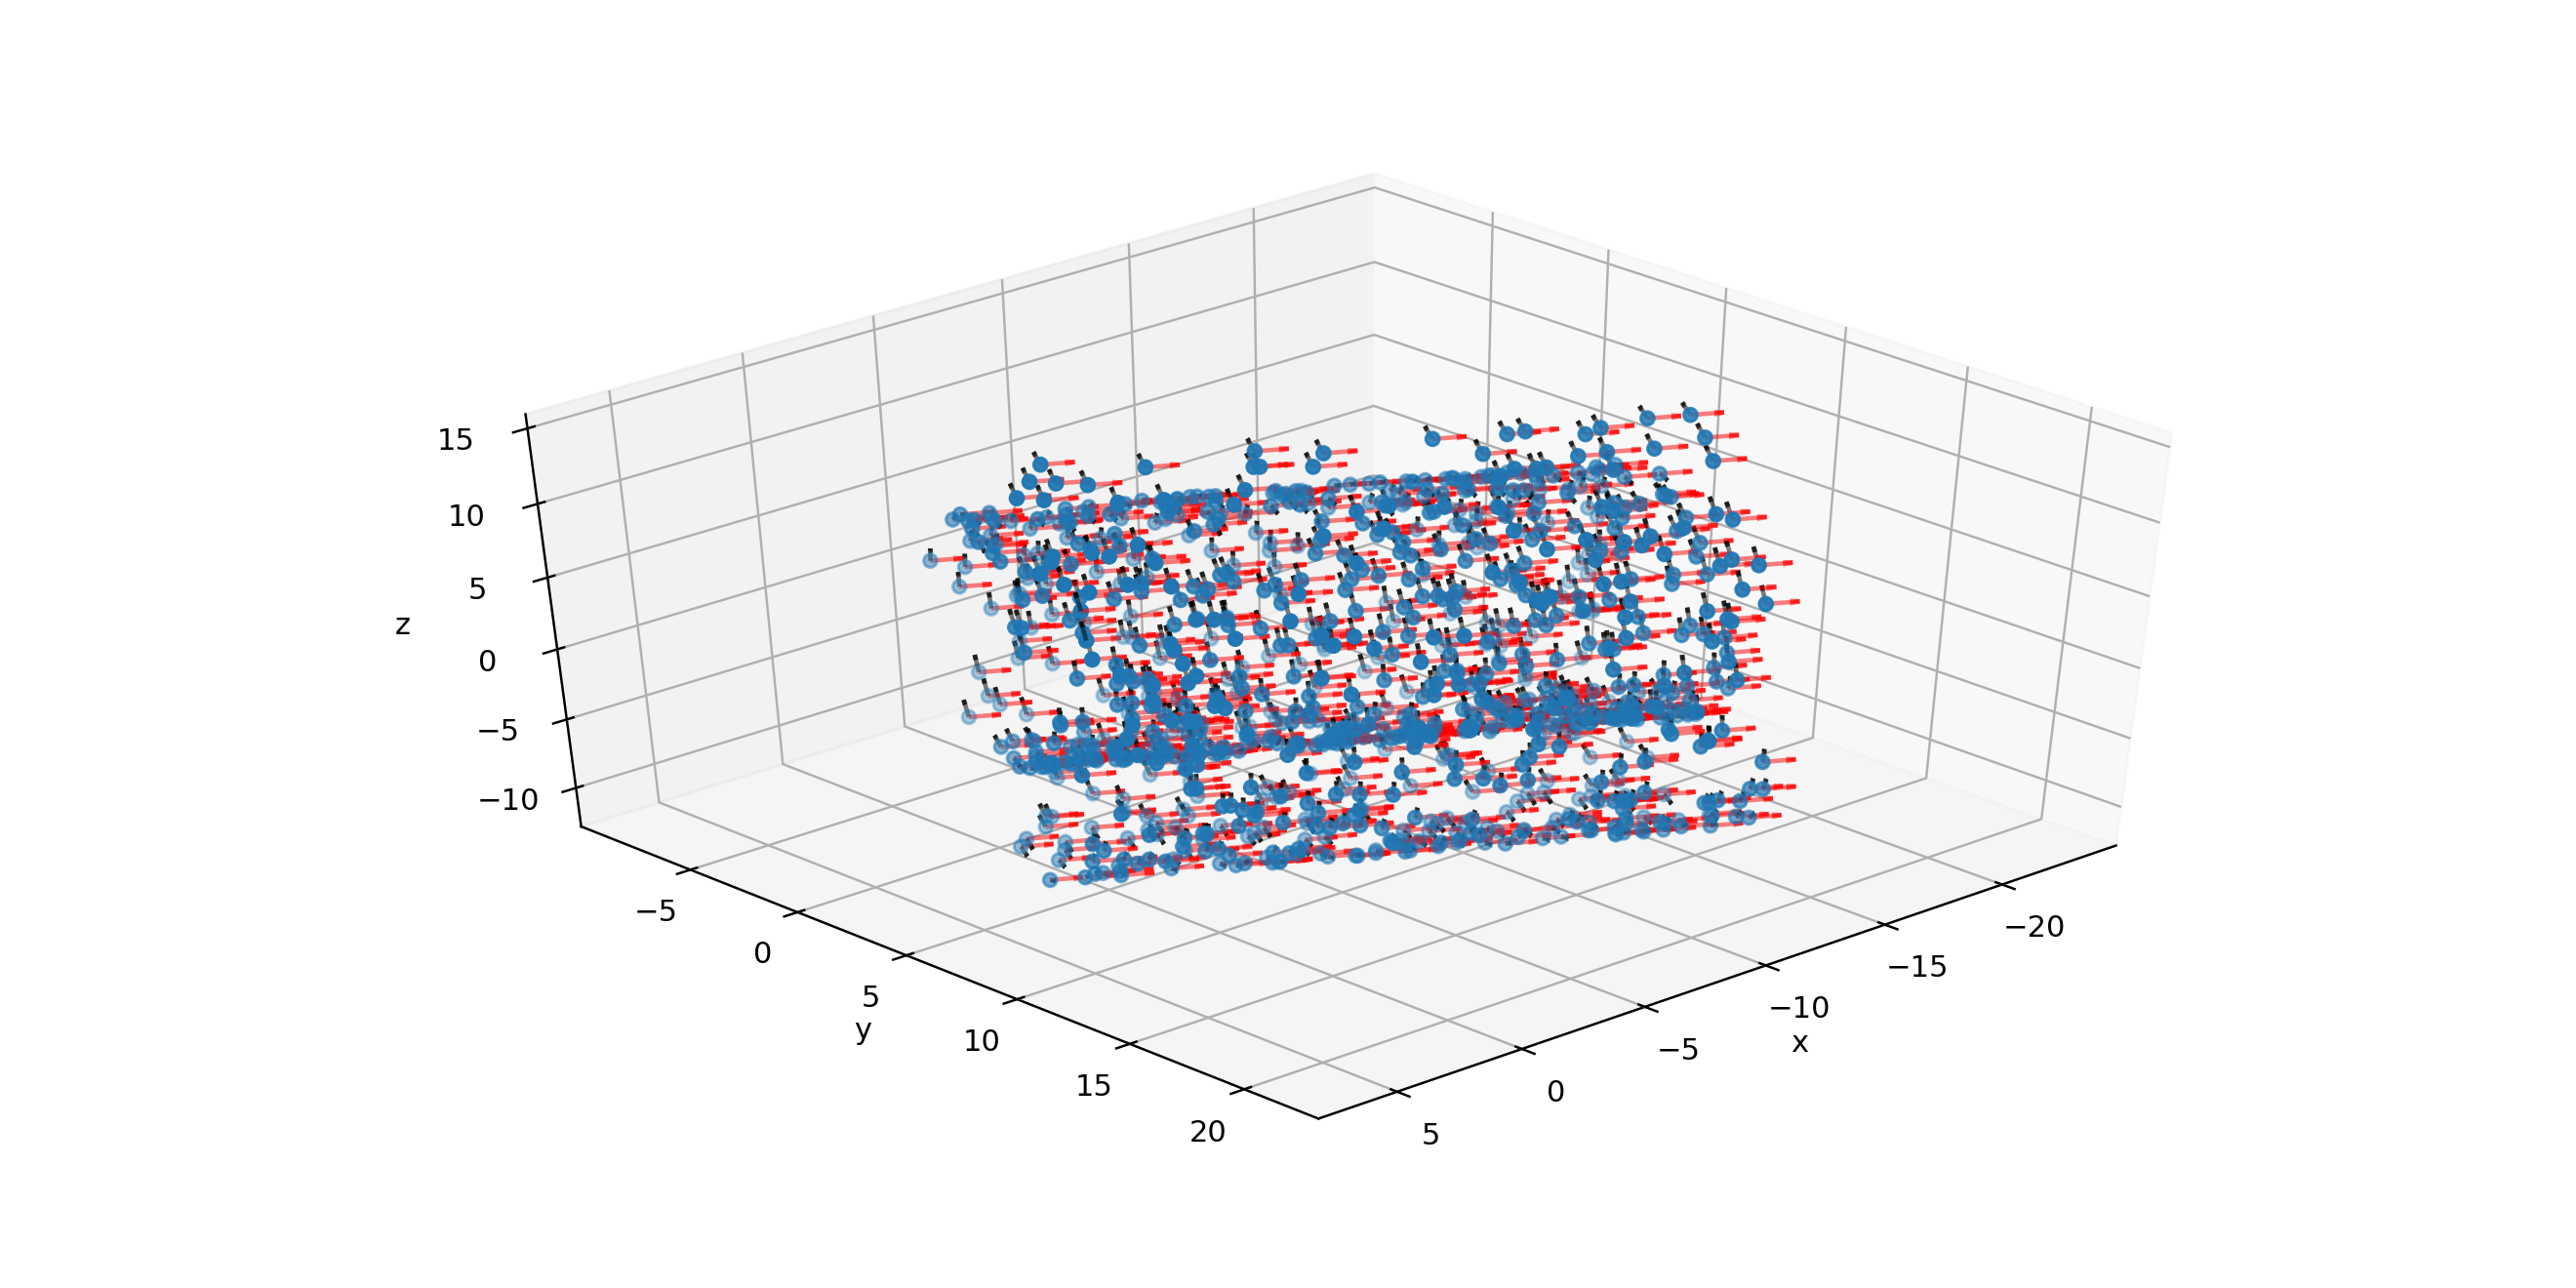

In [106]:
                %matplotlib notebook
                fig = plt.figure(figsize=(12,6))
                ax = fig.add_subplot(1, 1, 1, projection='3d')
                cax = ax.scatter(data2[:, 0], data2[:, 1], data2[:,2])
                ax.set(xlabel='x', ylabel='y', zlabel='z')
                for i in range(1000):
                    X,Y,Z = data2[i,:]
                    for j in range(2):
                        U,V,W = grads2[i,:,j] * 1
                        ax.quiver(X,Y,Z,U,V,W, alpha = .5, colors = cols[j])
                #ax.set_axis_off()
                #fig.colorbar(cax)

In [84]:
#generator = check_random_state(None)
#generator.rand(1, 10)


In [85]:
cols = ['black','red']

<IPython.core.display.Javascript object>


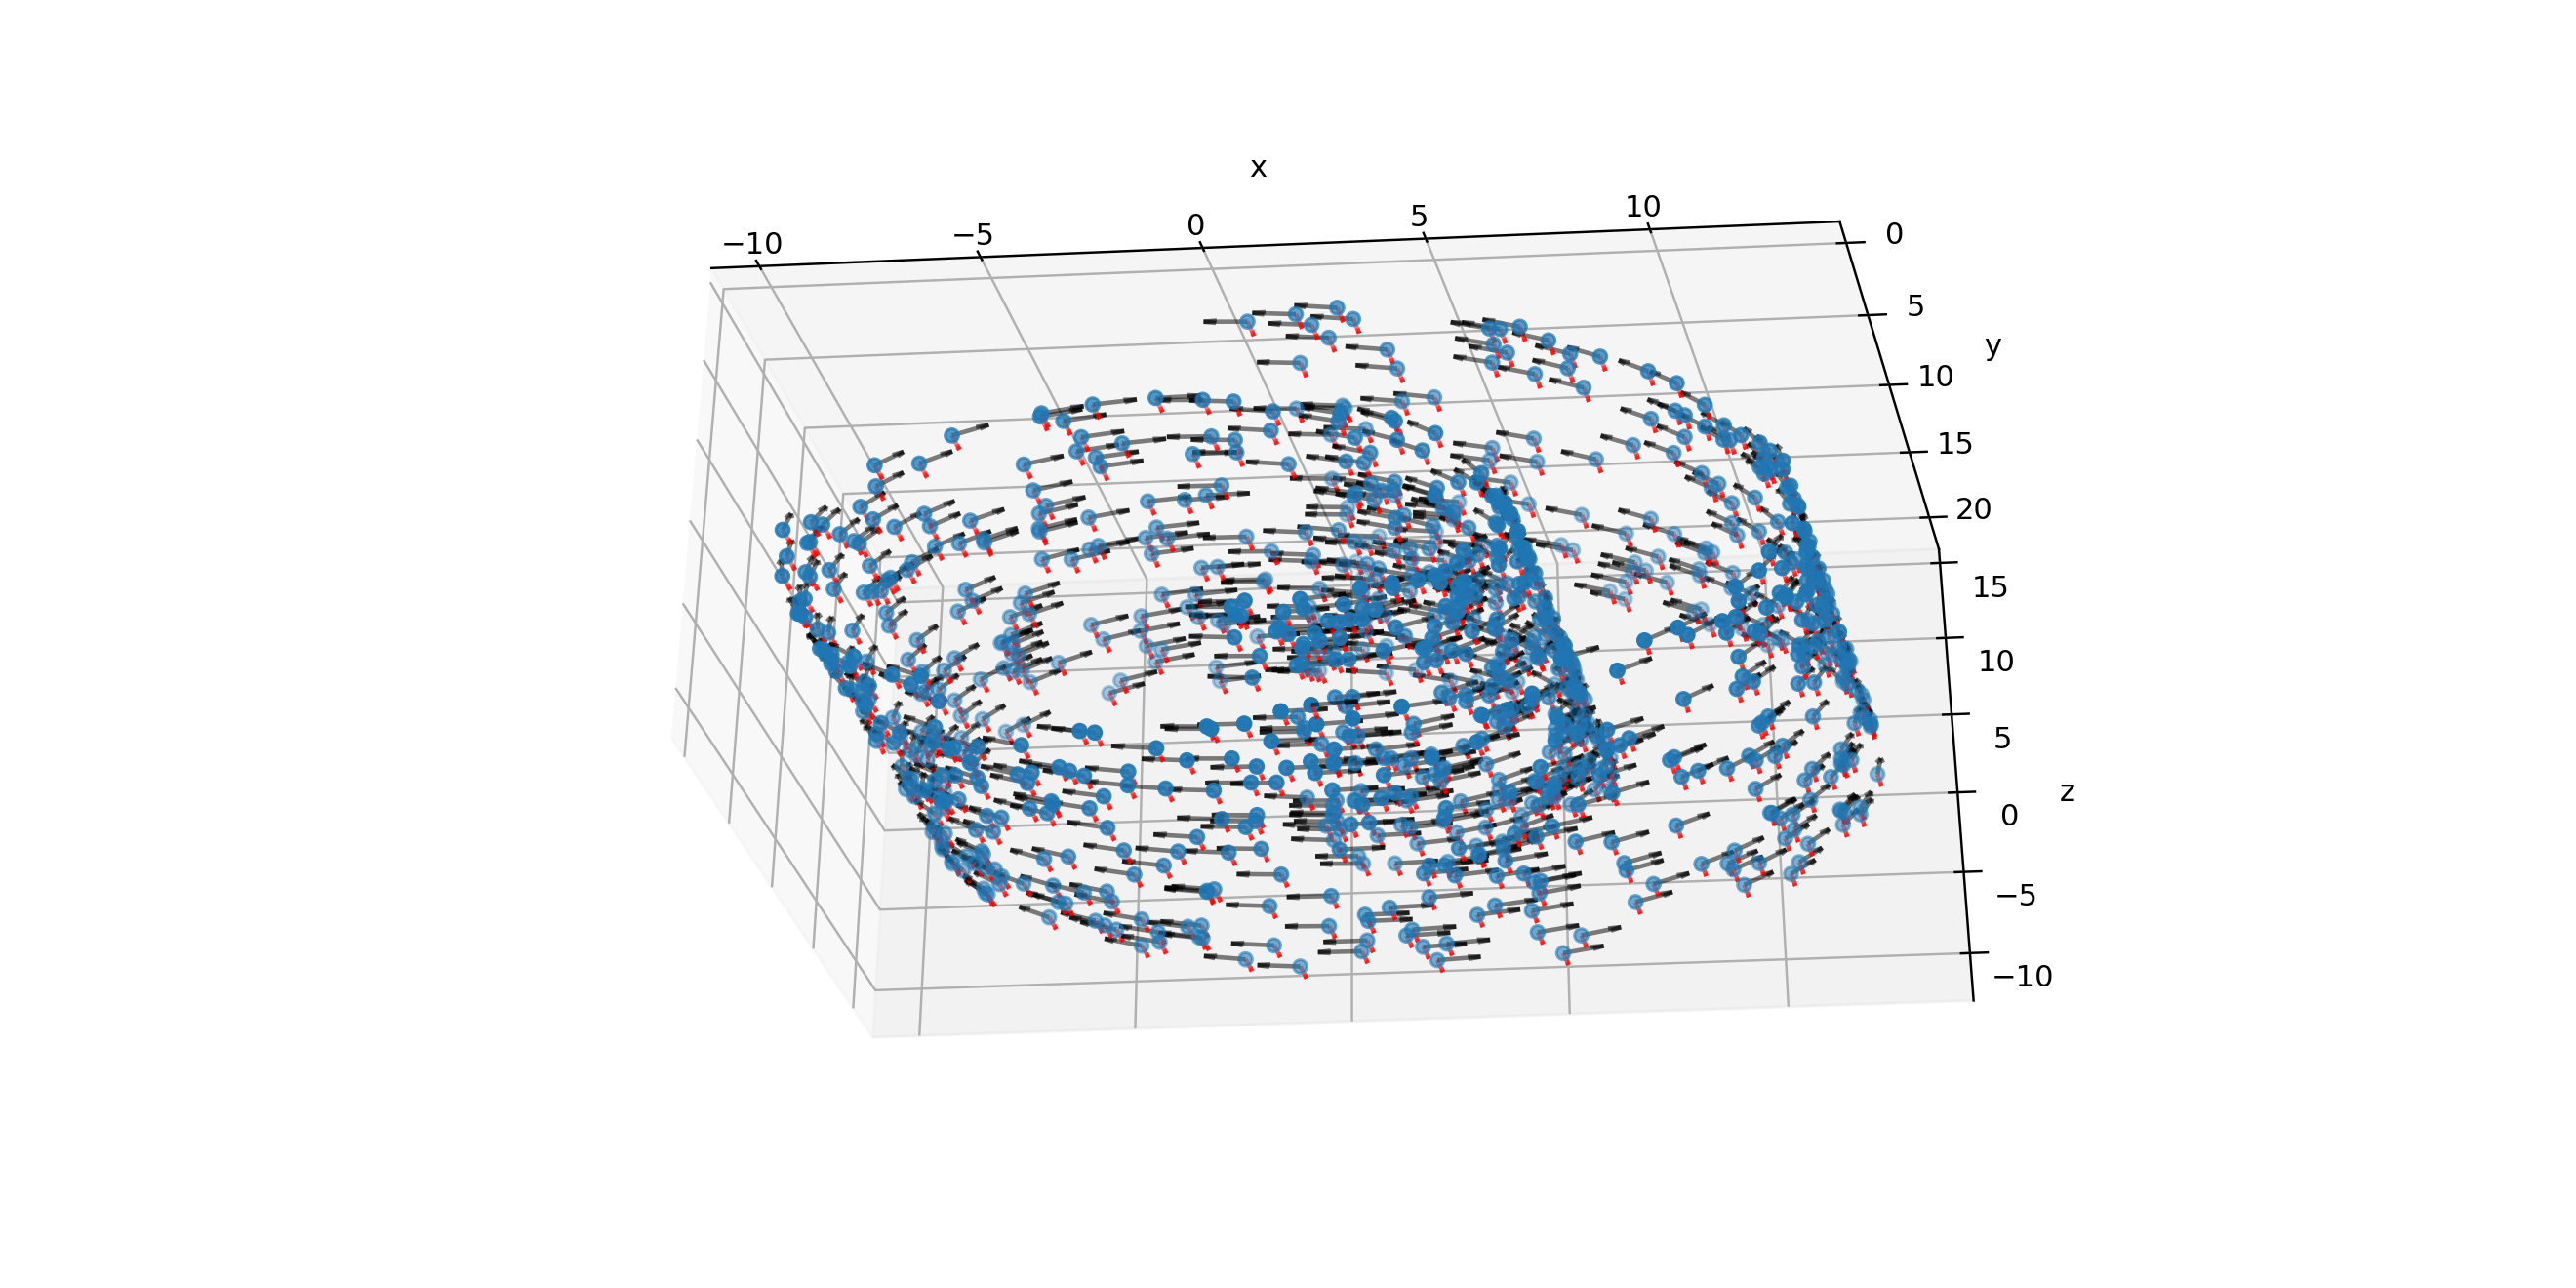

In [86]:
                %matplotlib notebook
                fig = plt.figure(figsize=(12,6))
                ax = fig.add_subplot(1, 1, 1, projection='3d')
                cax = ax.scatter(data[:, 0], data[:, 1], data[:,2])
                ax.set(xlabel='x', ylabel='y', zlabel='z')
                for i in range(1000):
                    X,Y,Z = data[i,:]
                    for j in range(2):
                        U,V,W = grads[i,:,j] * 1
                        ax.quiver(X,Y,Z,U,V,W, alpha = .5, colors = cols[j])
                #ax.set_axis_off()
                #fig.colorbar(cax)

In [74]:
grads[0]

array([[0.99858747, 1.        ],
       [0.        , 0.        ],
       [0.05313261, 0.        ]])

In [20]:
data

(array([[ 8.83534285e+00,  1.32601526e+01,  1.00990324e+01],
        [-7.96469728e+00,  1.43803131e+01,  4.08444708e+00],
        [ 1.75846821e+00,  1.17801809e+00, -4.75188828e+00],
        [ 8.53105492e+00,  1.17626994e+01,  1.03983755e+01],
        [ 1.71836186e+00,  1.81455021e+01, -4.75817524e+00],
        [ 4.89733594e+00,  1.32548580e+01, -2.98568550e+00],
        [-9.35092715e+00,  9.89551440e+00, -2.54153555e+00],
        [ 4.12625547e+00,  1.39536639e+01, -1.05916991e+01],
        [ 1.61246478e+00,  1.53460796e+01,  7.46929872e+00],
        [ 6.14572838e+00,  1.46141366e+01,  2.64059287e+00],
        [-4.12773166e+00,  1.47814533e+01, -9.75829700e+00],
        [-8.43990084e+00,  8.91749335e+00,  3.27840995e+00],
        [ 6.33345073e+00,  1.59861300e+01,  1.58114834e+00],
        [ 6.07656994e+00,  5.66954348e+00, -8.78052128e-01],
        [ 6.13147896e+00,  1.30178995e+00,  1.22201390e+01],
        [-9.47541247e+00,  1.29329966e+01, -8.05741857e-01],
        [-9.01823395e+00

In [66]:
diffusion_time = 0.05
dim  = 2
radius = (diffusion_time * (diffusion_time * np.pi * 4)**(dim/2))**(0.5)

In [67]:
radius

0.1772453850905516

In [68]:
diffusion_time = 1.
dim  = 2
radius = (diffusion_time * (diffusion_time * np.pi * 4)**(dim/2))**(0.5)

In [69]:
radius

3.5449077018110318

<IPython.core.display.Javascript object>


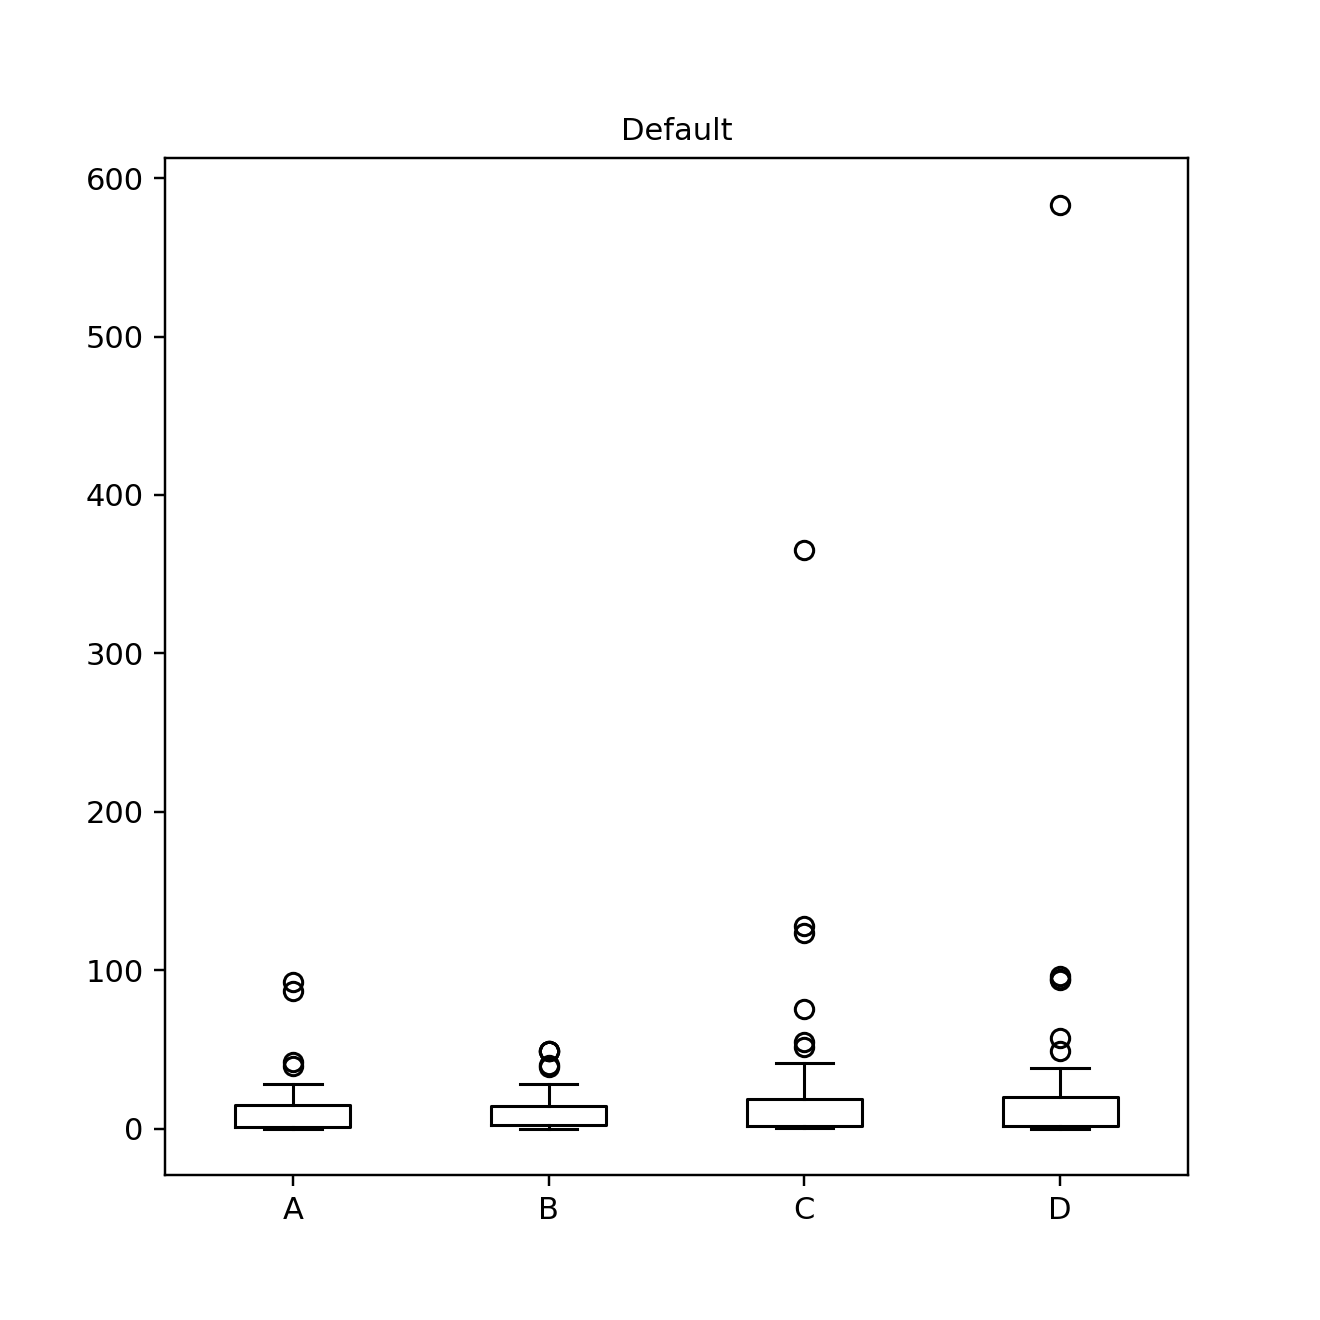

Text(0.5,1,'Default')

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True)
axes.boxplot(data, labels=labels, medianprops=dict(linestyle=''))
axes.set_title('Default', fontsize=fs)